In [7]:
import pandas as pd
import glob, os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [8]:
ls

alternate_cleaning_way2010.ipynb*   GoogleMaps_Display_Location.ipynb*
alternate_cleaning_way2010N.ipynb*  GoogleMaps_Geocoding_Example.ipynb*
alternate_cleaning_way2011.ipynb*   Houston_Crime1017.ipynb*
alternate_cleaning_way2011N.ipynb*  Houston_Crime_2008_Clean.ipynb*
alternate_cleaning_way2012.ipynb*   Houston_Crime_2009_Clean.ipynb*
alternate_cleaning_way2012N.ipynb*  Houston_Crime_2010_Clean.ipynb*
alternate_cleaning_way2013.ipynb*   Houston_Crime_2011_Clean.ipynb*
alternate_cleaning_way2013N.ipynb*  Houston_Crime_2012_Clean.ipynb*
alternate_cleaning_way2014.ipynb*   Houston_Crime_2013_Clean.ipynb*
alternate_cleaning_way2015N.ipynb*  Houston_Crime_2014_Clean.ipynb*
alternate_cleaning_way2016N.ipynb*  Houston_Crime_2015_Clean.ipynb*
alternate_cleaning_way2017N.ipynb*  Houston_Crime_2016_Clean.ipynb*
Combine_years.ipynb*                Houston_Crime_2017_Clean.ipynb*
crime_data_clean/                   img/
crime_data_raw/                     sevenYearsOfCrime.ipynb*
crime_final_cl

In [9]:
path = 'crime_final_clean10_17.csv'

In [10]:
df = pd.read_csv(path)

In [11]:
df.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
0,1914-09-08,24C60,12700-12799,LAKE HOUSTON,Burglary,Restaurant or Cafeteria,1.0,7.0,8,Tuesday,Sep,1914
1,1914-11-02,18F60,8800-8899,BELLAIRE,Burglary,Miscellaneous Business (Non-Specific),1.0,3.0,2,Monday,Nov,1914
2,1914-12-03,12D20,12800-12899,GULF,Auto Theft,No label,1.0,19.0,3,Thursday,Dec,1914
3,1915-01-05,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1.0,NaN,5,Tuesday,Jan,1915
4,1915-01-14,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1.0,NaN,14,Thursday,Jan,1915


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006326 entries, 0 to 1006325
Data columns (total 12 columns):
Date           1006326 non-null object
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           65536 non-null float64
day            1006326 non-null int64
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null int64
dtypes: float64(2), int64(2), object(8)
memory usage: 92.1+ MB


## Set Date as index

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date').sort_index(ascending=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006326 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           65536 non-null float64
day            1006326 non-null int64
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 92.1+ MB


## Get only events from 2010 - 2017

In [15]:
df7 = df.loc['2010':'2017']

In [16]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003745 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1003745 non-null object
BlockRange     1003589 non-null object
StreetName     1003719 non-null object
OffenseType    1003745 non-null object
Premise        1003745 non-null object
NumOffenses    1003745 non-null float64
Hour           65454 non-null float64
day            1003745 non-null int64
weekday        1003745 non-null object
month          1003745 non-null object
year           1003745 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 91.9+ MB


In [17]:
df7.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,15E30,4200-4299,WILLOWBEND,Theft,FIELD/WOODS,1.0,NaN,1,Friday,Jan,2010
2010-01-01,6B20,3700-3799,PINEMONT,Rape,APARTMENT,1.0,NaN,1,Friday,Jan,2010
2010-01-01,4F20,2900-2999,GESSNER,Theft,APARTMENT,1.0,NaN,1,Friday,Jan,2010
2010-01-01,20G30,3400-3499,WALNUT BEND,Theft,APARTMENT,1.0,NaN,1,Friday,Jan,2010
2010-01-01,17E30,9700-9799,GESSNER,Burglary,APARTMENT,1.0,NaN,1,Friday,Jan,2010


# Crime based of offense

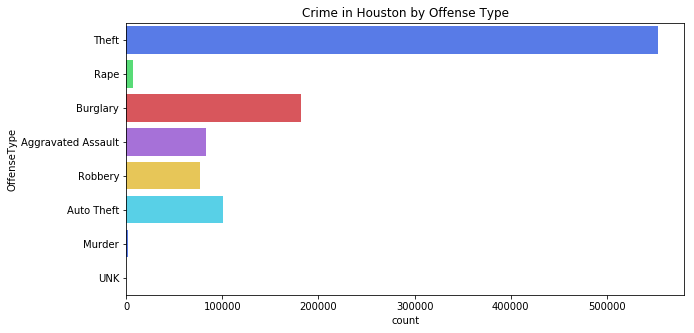

In [18]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(y="OffenseType",
              data=df7,
              palette='bright',
              alpha=0.75)
ax.set_title('Crime in Houston by Offense Type');

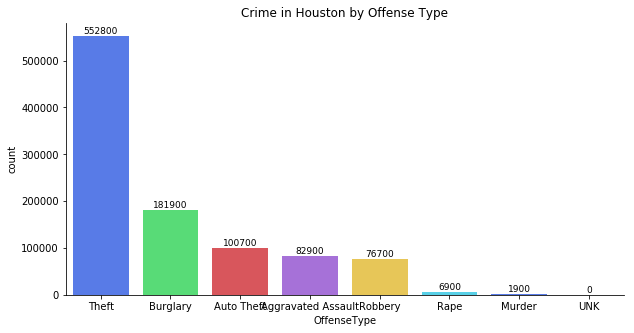

In [19]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="OffenseType",
              data=df7,
              palette='bright',
              alpha=0.75,
             order=df7['OffenseType'].value_counts().index)
ax.set_title('Crime in Houston by Offense Type');


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),  round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

In [60]:
df7.OffenseType.value_counts()

Theft                 552802
Burglary              181858
Auto Theft            100730
Aggravated Assault     82865
Robbery                76712
Rape                    6861
Murder                  1903
UNK                       14
Name: OffenseType, dtype: int64

## Month

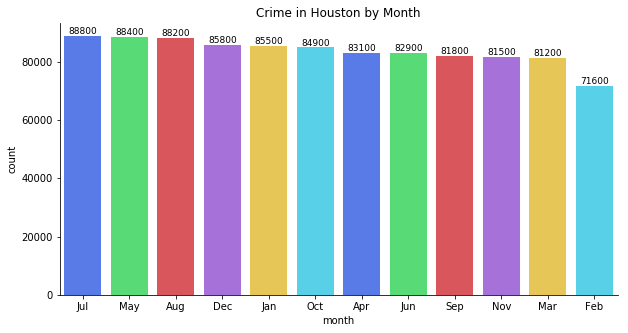

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="month",
              data=df7,
              palette='bright',
              alpha=0.75,
              order=df7['month'].value_counts().index)


ax.set_title('Crime in Houston by Month');
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

In [64]:
df7.month.value_counts()

Jul    88814
May    88371
Aug    88161
Dec    85838
Jan    85494
Oct    84900
Apr    83105
Jun    82904
Sep    81833
Nov    81506
Mar    81214
Feb    71605
Name: month, dtype: int64

## Weekday

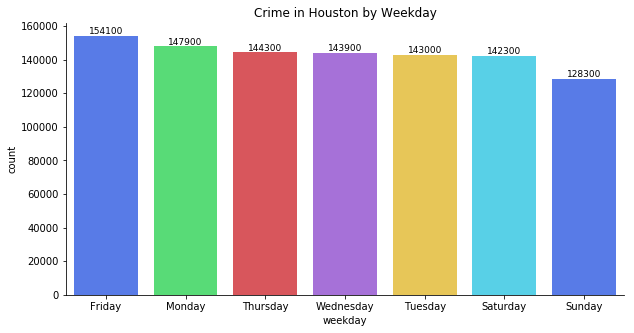

In [21]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="weekday",
              data=df7,
              palette='bright',
              alpha=0.75, order=df7['weekday'].value_counts().index)


ax.set_title('Crime in Houston by Weekday');
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

In [66]:
df7.weekday.value_counts()

Friday       154094
Monday       147879
Thursday     144309
Wednesday    143902
Tuesday      142979
Saturday     142261
Sunday       128321
Name: weekday, dtype: int64

# Hour

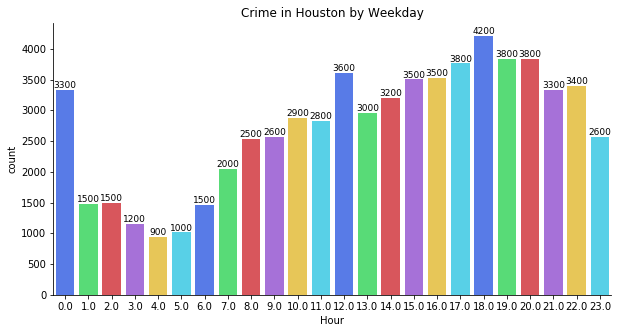

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="Hour",
              data=df7,
              palette='bright',
              alpha=0.75)


ax.set_title('Crime in Houston by Weekday');
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

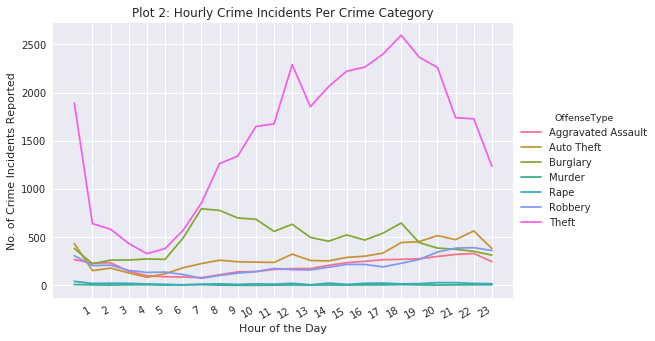

In [68]:
crimeCategorygroup = df7.groupby(["Hour","OffenseType"])
crimeCategorygroup = crimeCategorygroup.size().reset_index()
crimeCategorygroup.columns = ['Hour','OffenseType','count']
g = sns.FacetGrid(crimeCategorygroup, hue='OffenseType', size=5, aspect=1.5)
g.map(plt.plot, 'Hour', 'count').add_legend()
g.ax.set(xlabel='Hour of the Day',
    xticks = np.arange(1,24,1),
    ylabel='No. of Crime Incidents Reported',
    title='Plot 2: Hourly Crime Incidents Per Crime Category')
g.fig.autofmt_xdate()

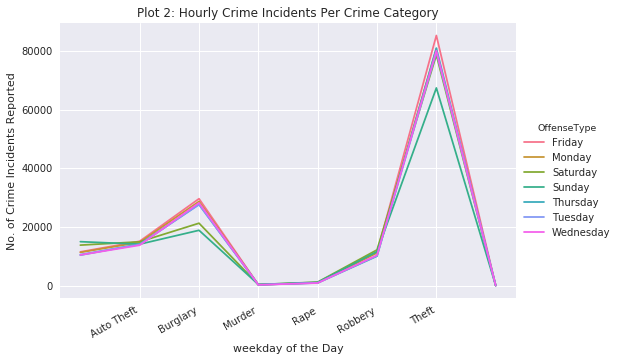

In [80]:
crimeCategorygroup = df7.groupby(["OffenseType",'weekday'])
crimeCategorygroup = crimeCategorygroup.size().reset_index()
crimeCategorygroup.columns = ['weekday','OffenseType','count']
g = sns.FacetGrid(crimeCategorygroup, hue='OffenseType', size=5, aspect=1.5)
g.map(plt.plot, 'weekday', 'count').add_legend()
g.ax.set(xlabel='weekday of the Day',
    xticks = np.arange(1,7,1),
    ylabel='No. of Crime Incidents Reported',
    title='Plot 2: Hourly Crime Incidents Per Crime Category')
g.fig.autofmt_xdate()

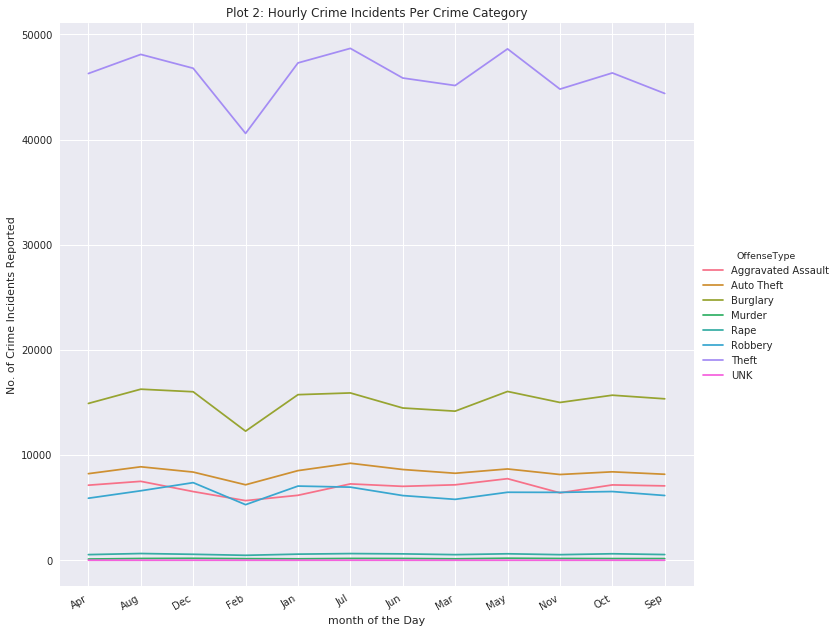

In [110]:
crimeCategorygroup = df7.groupby(['month', "OffenseType"])
crimeCategorygroup = crimeCategorygroup.size().reset_index()
crimeCategorygroup.columns = ['month','OffenseType','count']
g = sns.FacetGrid(crimeCategorygroup, hue='OffenseType', size=10, aspect=1)
g.map(plt.plot, 'month', 'count').add_legend()
g.ax.set(xlabel='month of the Day',
    xticks = np.arange(0,12,1),
    ylabel='No. of Crime Incidents Reported',
    title='Plot 2: Hourly Crime Incidents Per Crime Category')
g.fig.autofmt_xdate()

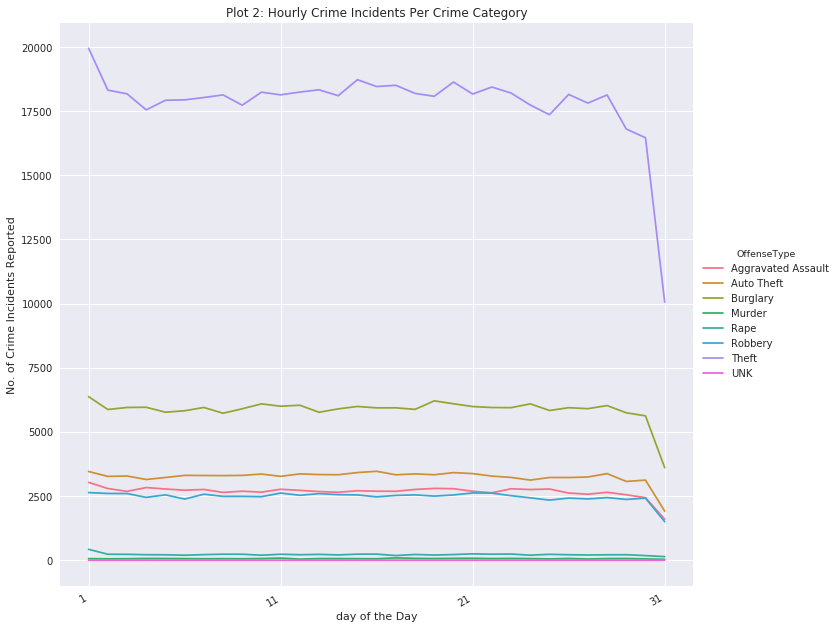

In [118]:
crimeCategorygroup = df7.groupby(['h', "OffenseType"])
crimeCategorygroup = crimeCategorygroup.size().reset_index()
crimeCategorygroup.columns = ['day','OffenseType','count']
g = sns.FacetGrid(crimeCategorygroup, hue='OffenseType', size=10, aspect=1)
g.map(plt.plot, 'day', 'count').add_legend()
g.ax.set(xlabel='day of the Day',
    xticks = np.arange(1,32,10),
    ylabel='No. of Crime Incidents Reported',
    title='Plot 2: Hourly Crime Incidents Per Crime Category')
g.fig.autofmt_xdate()

In [ ]:
crimeCategorygroup = seattleData.groupby(["Hour","crime_category","Summarized Offense Description"])

crimeCategorygroup = crimeCategorygroup.size().reset_index()

crimeCategorygroup.columns = ['hour','crime_category','Summarized Offense Description','count']


##Logic to pick the top n records from each of the groups based on the count.                         
select_number = pd.DataFrame({'number_to_select': {'Major Theft': 5, 'Minor Theft': 5, 
                                                   'Major Offense': 5,'Minor Offense': 5,
                                                    'Auto Theft' : 2}})

CCG =  crimeCategorygroup.groupby(["crime_category","Summarized Offense Description"]).sum().reset_index()
CCG = CCG[CCG["crime_category"].isin(["Major Theft", "Major Offense"])]
CCG = CCG.groupby(["crime_category"]).apply(lambda dfg: (dfg.nlargest(4, "count"))).reset_index(drop=True)

crimeCategorygroup= crimeCategorygroup[crimeCategorygroup["Summarized Offense Description"].isin(CCG["Summarized Offense Description"])] 

#with sns.plotting_context(font_scale=0):
g = sns.FacetGrid(crimeCategorygroup, row="crime_category",row_order =["Major Offense","Major Theft"],
                      hue="Summarized Offense Description", size=5, aspect=2,sharey=False,sharex=False) 
g.map(plt.plot, 'hour', 'count').add_legend()

g.set(xlabel='Hour of the Day',
      xticks = np.arange(0,25,1),
      ylabel='No. of Crime Incidents Reported')

# Day

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="day",
              data=df7,
              palette='bright',
              alpha=0.75)


ax.set_title('Crime in Houston by day');
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

In [ ]:
df7.day.value_counts().head()

# Year

In [1]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="year",
              data=df7,
              palette='bright',
              alpha=0.75)


ax.set_title('Crime in Houston by day');
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

NameError: name 'plt' is not defined

In [ ]:
df7.year.value_counts()

In [ ]:
df7.head()

# Premise

In [ ]:
#premise
fig, ax = plt.subplots()
# Plotting crimes by premise
sns.barplot(y=df7["Premise"].value_counts().index[0:10], 
                 x=df7["Premise"].value_counts().head(10), ax=ax)
# Axes
ax.set_title("Location of Crimes")
ax.set_xlabel("Crime Count")
#ax.set_ylabel("Crime Location")
sns.despine()

In [ ]:
fig, ax = plt.subplots()
# Plotting crimes by month
sns.barplot(y=df7["month"].value_counts().index[0:12], 
                 x=df7["month"].value_counts().head(12), ax=ax)
# Axes
ax.set_title("Crime by month")
ax.set_xlabel("Crime Count")
#ax.set_ylabel("crimes in a month")
sns.despine()

In [ ]:
# police beat
fig, ax = plt.subplots()
# Plotting crimes by type
sns.barplot(y=df7["Beat"].value_counts().index[0:10], 
                 x=df["Beat"].value_counts().head(10), ax=ax)
# Axes
ax.set_title("Crime count base on Police Beat")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Police Beat")
sns.despine()

In [ ]:
# Weekday
fig, ax = plt.subplots()
# Plotting crimes by type
sns.barplot(y=df7["Hour"].value_counts(), 
                 x=df["Hour"].value_counts().index[0:25], ax=ax)
# Axes
ax.set_title("Crime count base Hour")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("number of events")
sns.despine()

In [ ]:
# Saving top 10 types of locations
crimetoptype = df7["OffenseType"].value_counts().head(10).index
# Choosing data that is included in the top 10 types of crimes (by selection)
crimepremtype = df7.loc[df7["OffenseType"].isin(crimetoptype)]

In [ ]:
# Type of Crime by Location
sns.set_palette("hls", n_colors=7)
ax = sns.factorplot(x="weekday", hue="OffenseType", 
                    kind="count", data=crimepremtype, 
                    size=4, aspect=2)
# Axes
plt.title("Crime by Location")
ax.set_xticklabels(rotation=-60)
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

In [ ]:
# We only look at crime data from the 5 highest crime beats
beats = [beat for beat in df7['Premise'].value_counts().head().reset_index()['index']]
df2 = pd.DataFrame()
for beat in beats:
    df2 = pd.concat([df2,df7[df7['Premise']==beat]],axis=0)
df2.head()

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='Premise',hue='OffenseType',data=df2,palette='bright',alpha=0.75)
ax.set_title('Premise, by Offense, in the highest crime  of Houston')
ax.set_xlabel('Premise', fontsize=15);

In [ ]:
# We only look at crime data from the 5 highest crime beats
beats = [beat for beat in df7['OffenseType'].value_counts().head().reset_index()['index']]
df2 = pd.DataFrame()
for beat in beats:
    df2 = pd.concat([df2,df7[df7['OffenseType']==beat]],axis=0)
df2.head()

In [ ]:
# We only look at crime data from the 5 highest crime beats
beats = [beat for beat in df7['OffenseType'].value_counts().head(7).reset_index()['index']]
df2 = pd.DataFrame()


for beat in beats:
    df2 = pd.concat([df2,df7[df7['OffenseType']==beat]],axis=0)

fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='OffenseType',hue='weekday',data=df2,palette='bright',alpha=0.75)
ax.set_title('something, by other, in the highest inhouston')
ax.set_xlabel('something', fontsize=15);
 

In [ ]:
df.head()

In [ ]:
# We only look at crime data from the 5 highest crime beats
beats = [beat for beat in df7['OffenseType'].value_counts().head(7).reset_index()['index']]
df2 = pd.DataFrame()


for beat in beats:
    df2 = pd.concat([df2,df7[df7['OffenseType']==beat]],axis=0)

fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='OffenseType',hue='year',data=df2,palette='bright',alpha=0.75)
ax.set_title('something, by other, in the highest inhouston')
ax.set_xlabel('something', fontsize=15);

In [ ]:
df7.OffenseType.unique()

In [ ]:
auto_theft = df7[df7.OffenseType == 'Auto Theft']
murder = df7[df7.OffenseType == 'Murder']

In [ ]:
plt.figure(figsize=(10,5))
count = sns.countplot(
    data = murder, 
    x = 'month',
    order=murder['month'].value_counts().index
)

plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x="month",
              data=df7,
              palette='bright',
              alpha=0.75,
             order=df7['month'].value_counts().index)


ax.set_title('Crime in Houston by day');
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

In [ ]:
# We only look at crime data from the 5 highest crime beats
beats = [beat for beat in df7['Beat'].value_counts().head().reset_index()['index']]
df2 = pd.DataFrame()
for beat in beats:
    df2 = pd.concat([df2,df7[df7['Beat']==beat]],axis=0)
df2.head()

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x='Beat',hue='OffenseType',data=df2,palette='bright',alpha=0.75)
ax.set_title('Beats, by Offense, in the highest crime Beats of Houstons 2015')
ax.set_xlabel('Beats', fontsize=15);
# What inferences can we draw from this? Why does violence against women spike in certain 
# neighbourhoods? Looking at the nature of the crime (provided in the dataset) or the
# neighbourhood incomes and demographics (which would have to be sourced from outside), might
# provide some clues. 

In [ ]:
plt.figure(figsize=(10,5))
count = sns.countplot(
    data = df7, 
    y = 'OffenseType',
    order=df7['OffenseType'].value_counts().index
)

plt.show()

In [ ]:
plt.figure(figsize=(10,5))
count = sns.countplot(
    data = df7, 
    x = 'OffenseType',
    order=df7['OffenseType'].value_counts().index
)

plt.show()

In [ ]:
plt.figure(figsize=(10,30))
count = sns.countplot(
    data = df7, 
    y = 'Beat',
    order=df7['Beat'].value_counts().index
)

plt.show()

In [ ]:
df7.head()

In [ ]:
df7.info()

In [ ]:
plt.figure(figsize=(10,5))
count = sns.countplot(
    data = df7, 
    x = 'weekday',
    order=df7['weekday'].value_counts().index
)

plt.show()

In [ ]:
sns.stripplot(x='weekday', y = 'NumOffenses',data=df7)

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x='weekday',
                  data=df7)

plt.show()

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x='weekday', hue='OffenseType',
                  data=df7)

plt.show()

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(y='weekday', hue='OffenseType',
                  data=df7)

plt.show()

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(y='weekday', hue='OffenseType',
                  data=df7, palette='Set2')

plt.show()

In [ ]:
plt.figure(figsize=(10,5))

g = sns.factorplot(x="OffenseType", hue="year", col="weekday",
                    data=df7, kind="count",
                    size=4, aspect=.7);

In [ ]:
df7.head()

In [ ]:
df7.pivot(index='Date',columns='weekday', values='NumOffenses')

In [ ]:
crashes.head()